In [1]:
import cv2
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5,1,'Original Image')

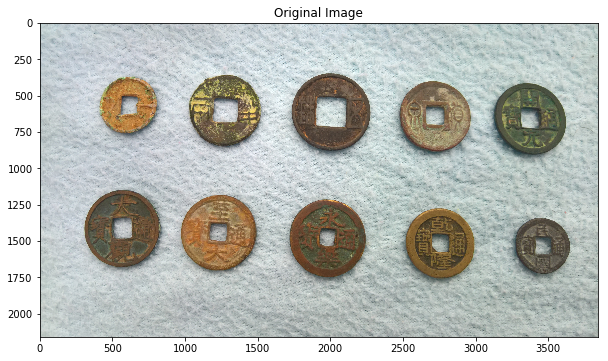

In [9]:
# Image path
imagePath = "CoinsB.jpg"
image = cv2.imread(imagePath)
plt.imshow(image[:,:,::-1])
plt.title("Original Image")

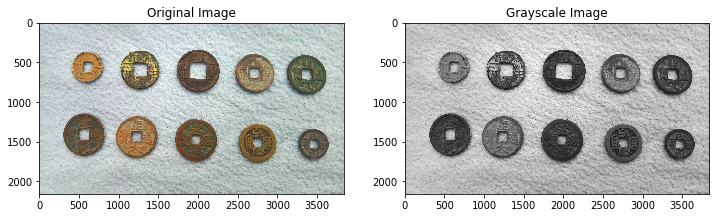

In [10]:
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

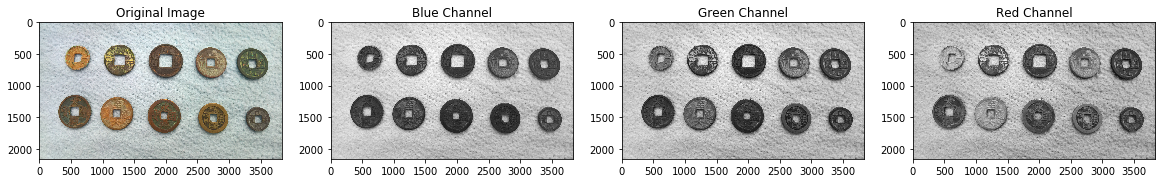

In [11]:
imageB=image[:,:,0]
imageG=image[:,:,1]
imageR=image[:,:,2]
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

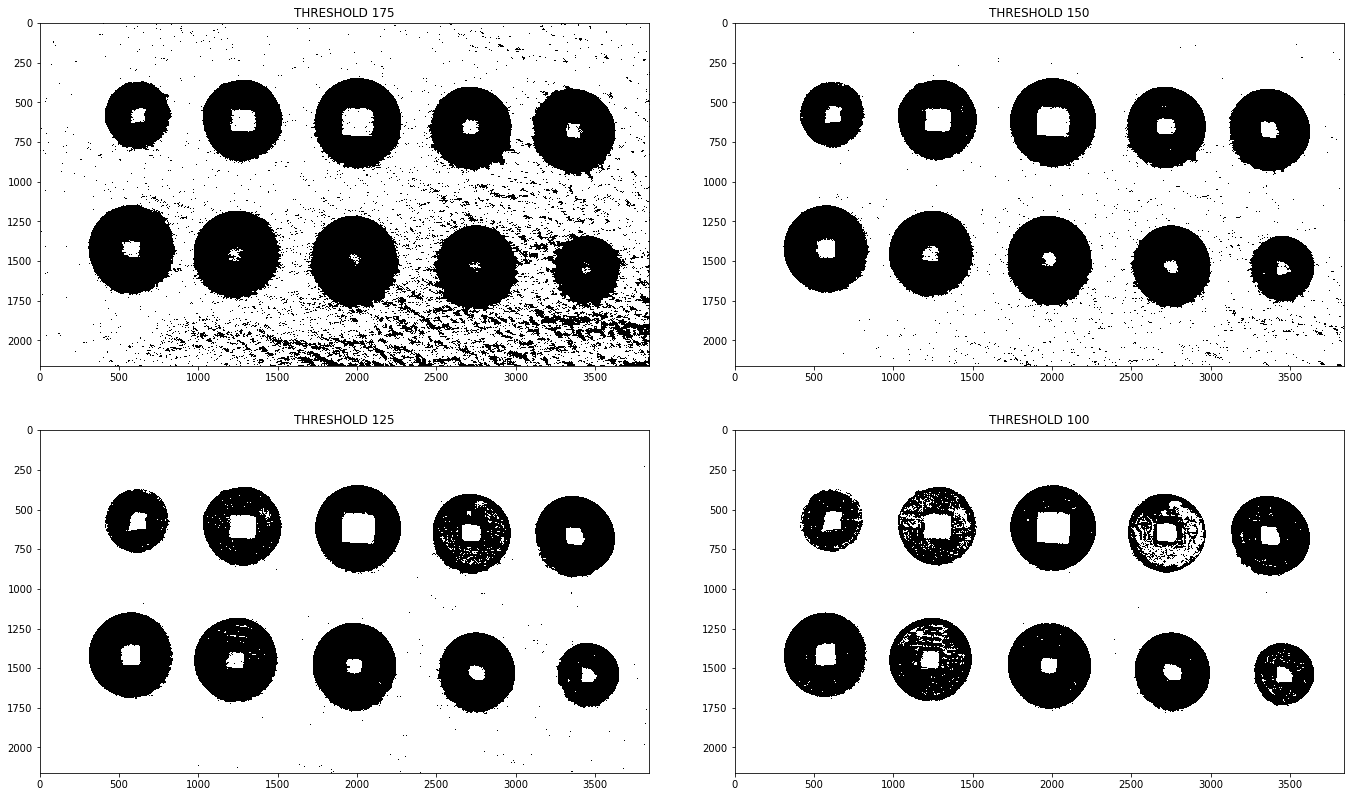

In [12]:
maxVal = 255
_, tImg_0 = cv2.threshold(imageB, 175, maxVal, cv2.THRESH_BINARY)
_, tImg_1 = cv2.threshold(imageB, 150, maxVal, cv2.THRESH_BINARY)
_, tImg_2 = cv2.threshold(imageB, 125, maxVal, cv2.THRESH_BINARY)
_, tImg_3 = cv2.threshold(imageB, 100, maxVal, cv2.THRESH_BINARY)
plt.figure(figsize=(20,20));
plt.subplot(221);plt.title("THRESHOLD 175");plt.imshow(tImg_0);
plt.subplot(222);plt.title("THRESHOLD 150");plt.imshow(tImg_1);
plt.subplot(223);plt.title("THRESHOLD 125");plt.imshow(tImg_2);
plt.subplot(224);plt.title("THRESHOLD 100");plt.imshow(tImg_3);
plt.tight_layout(5,-35);
plt.show();

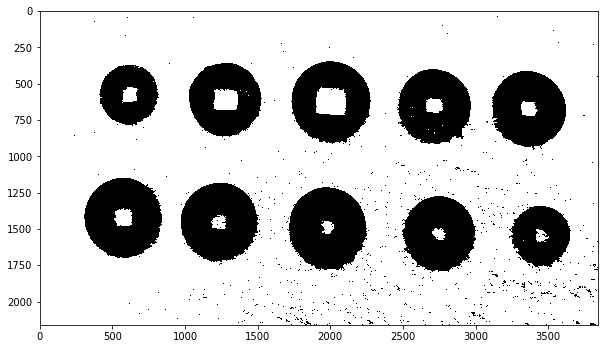

In [101]:
plt.imshow(tImg_1)

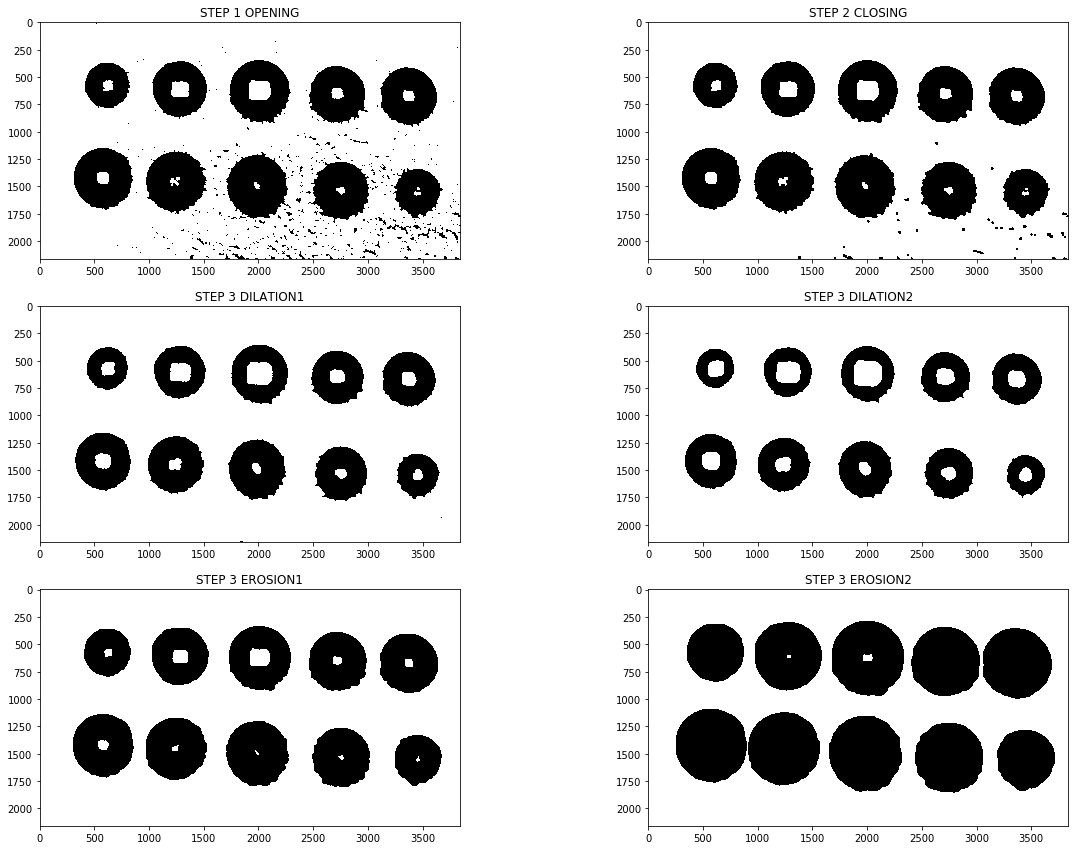

In [120]:
##STEP 1 OPENING
ksize=20
k_e=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
opening1=cv2.morphologyEx(tImg_1,cv2.MORPH_OPEN,k_e)
##Step 2 closing
k_e=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
closing1=cv2.morphologyEx(opening1,cv2.MORPH_CLOSE,k_e)
##Step 3 DILATION
ksize=15
k_e=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
dilation1=cv2.morphologyEx(closing1,cv2.MORPH_DILATE,k_e,iterations=2)
##Step 4 DILATION
ksize=15
k_e=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
dilation2=cv2.morphologyEx(dilation1,cv2.MORPH_DILATE,k_e,iterations=2)
##Step 5 EROSION
ksize=20
k_e=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
erosion1=cv2.morphologyEx(dilation2,cv2.MORPH_ERODE,k_e,iterations=4)
##Step 6 EROSION
ksize=25
k_e=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize,ksize))
erosion2=cv2.morphologyEx(erosion1,cv2.MORPH_ERODE,k_e,iterations=4)
plt.figure(figsize=(20,20));
plt.subplot(421);plt.title("STEP 1 OPENING");plt.imshow(opening1);
plt.subplot(422);plt.title("STEP 2 CLOSING");plt.imshow(closing1);
plt.subplot(423);plt.title("STEP 3 DILATION1");plt.imshow(dilation1);
plt.subplot(424);plt.title("STEP 3 DILATION2");plt.imshow(dilation2);
plt.subplot(425);plt.title("STEP 3 EROSION1");plt.imshow(erosion1);
plt.subplot(426);plt.title("STEP 3 EROSION2");plt.imshow(erosion2);

In [121]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [122]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

In [123]:
detections = detector.detect(erosion2)
print(detections)

[<KeyPoint 000002BF3E76BC60>, <KeyPoint 000002BF3E76BA50>, <KeyPoint 000002BF3E76BD80>, <KeyPoint 000002BF3E76BC00>, <KeyPoint 000002BF3E76BF60>, <KeyPoint 000002BF3E76B720>, <KeyPoint 000002BF3E76B8D0>, <KeyPoint 000002BF3EFD4090>]


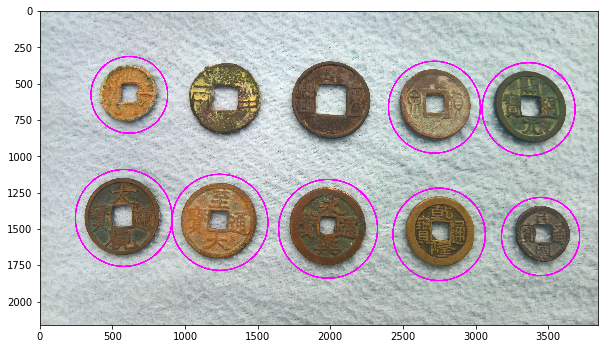

In [100]:
erosion2_c=erosion2.copy()
image_c=image.copy()
for i in detections:
    x,y = i.pt
    x = int(x)
    y = int(y)
    cv2.circle(image_c,(x,y),int(i.size/2),(255,0,255),10,cv2.LINE_AA)
plt.imshow(image_c[:,:,::-1])

In [81]:
cca1 = cv2.connectedComponents(binaryImg)
cca2 = cv2.connectedComponents(erosion2)
print(cca2)
print(cca1)

(4, array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32))
(4, array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32))


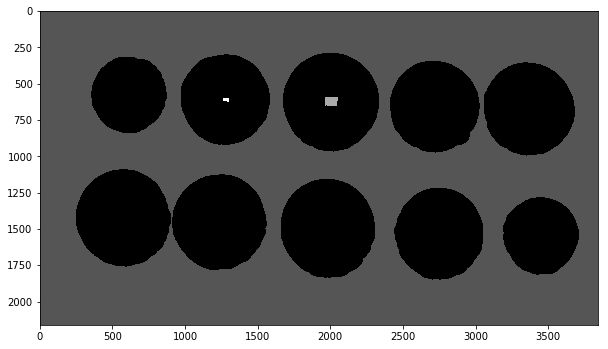

In [16]:
plt.imshow(cca1[1]);

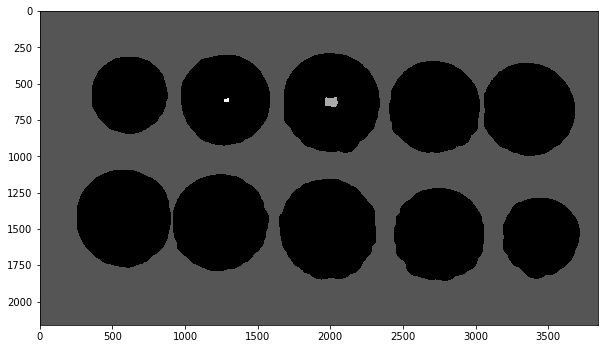

In [17]:
plt.imshow(cca2[1]);

In [18]:
def displayConnectComponentAnalysis(img):
    minval,maxval,minloc,maxloc = cv2.minMaxLoc(img)
    imgnew = 255 * (img - minval)/(maxval-minval)
    imgnew = np.uint8(imgnew)
    imgnew = cv2.applyColorMap(imgnew,cv2.COLORMAP_JET)
    plt.imshow(imgnew[:,:,::-1])

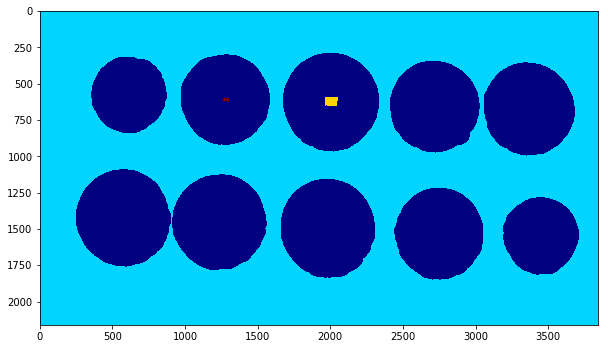

In [19]:
displayConnectComponentAnalysis(cca1[1])

In [20]:
help(cv2)

Help on module cv2:

NAME
    cv2 - Python wrapper for OpenCV.

SUBMODULES
    Error
    aruco
    bgsegm
    bioinspired
    cuda
    datasets
    detail
    dnn
    face
    fisheye
    flann
    freetype
    ft
    hdf
    hfs
    img_hash
    instr
    ipp
    kinfu
    line_descriptor
    linemod
    ml
    motempl
    multicalib
    ocl
    ogl
    omnidir
    optflow
    plot
    ppf_match_3d
    quality
    reg
    rgbd
    saliency
    samples
    sfm
    structured_light
    text
    utils
    videoio_registry
    videostab
    ximgproc
    xphoto

CLASSES
    builtins.Exception(builtins.BaseException)
        error
    builtins.object
        Algorithm
            AlignExposures
                AlignMTB
            BackgroundSubtractor
                BackgroundSubtractorKNN
                BackgroundSubtractorMOG2
                bgsegm_BackgroundSubtractorCNT
                bgsegm_BackgroundSubtractorGMG
                bgsegm_BackgroundSubtractorGSOC
                bgse

In [21]:
contours,heirarchy=cv2.findContours(erosion2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [22]:
imagecopy=image.copy()

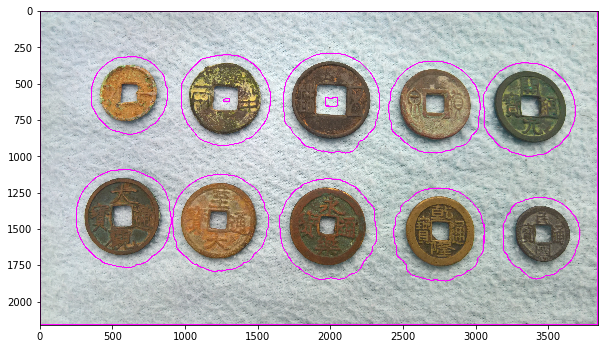

In [23]:
i = cv2.drawContours(imagecopy,contours,-1,(255,0,255),5,cv2.LINE_AA)
plt.imshow(i[:,:,::-1])

In [24]:
heirarchy[0]

array([[ 1, -1, -1, -1],
       [ 2,  0, -1, -1],
       [ 3,  1, -1, -1],
       [ 4,  2, -1, -1],
       [ 5,  3, -1, -1],
       [ 6,  4, -1, -1],
       [ 7,  5, -1, -1],
       [ 8,  6, -1, -1],
       [ 9,  7, -1, -1],
       [10,  8, -1, -1],
       [11,  9, -1, -1],
       [12, 10, -1, -1],
       [-1, 11, -1, -1]], dtype=int32)

In [25]:
area_arr = np.array([])
perimeter_arr = np.array([])

In [26]:
for i in range(len(heirarchy[0])):
    a = cv2.contourArea(contours[i])
    area_arr = np.append(area_arr,a)
    p = cv2.arcLength(contours[i],True)
    perimeter_arr = np.append(perimeter_arr,p)

In [27]:
area_arr.sort()
perimeter_arr.sort()
print(area_arr)
print(perimeter_arr)

[8.170000e+02 4.763500e+03 2.203150e+05 2.291960e+05 3.054405e+05
 3.177225e+05 3.181140e+05 3.210305e+05 3.464825e+05 3.481360e+05
 3.620175e+05 3.648775e+05 8.288401e+06]
[  118.48528123   289.98275542  1751.15554738  1809.23880947
  2067.02055407  2121.36369824  2123.58909321  2134.63577473
  2211.63072109  2216.35864198  2266.35864174  2275.61347806
 11996.        ]


In [28]:
area_arr = np.delete(area_arr,(0,1,12))
perimeter_arr = np.delete(perimeter_arr,(0,1,12))

In [29]:
print(area_arr)
print(perimeter_arr)

[220315.  229196.  305440.5 317722.5 318114.  321030.5 346482.5 348136.
 362017.5 364877.5]
[1751.15554738 1809.23880947 2067.02055407 2121.36369824 2123.58909321
 2134.63577473 2211.63072109 2216.35864198 2266.35864174 2275.61347806]


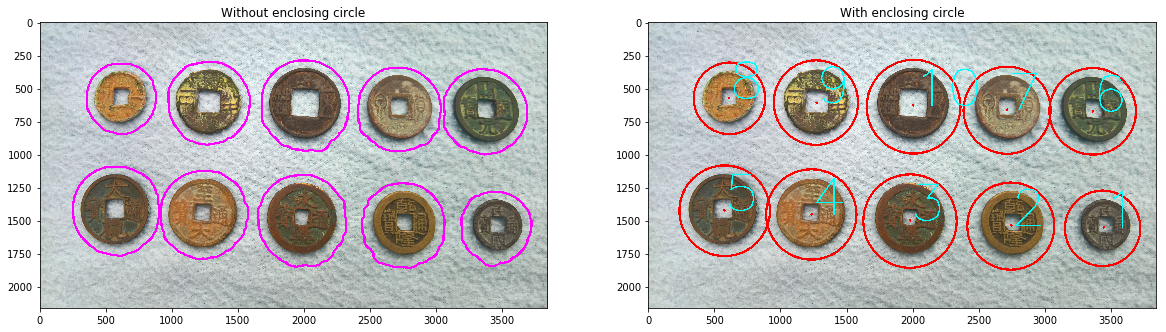

In [30]:
newcon=image.copy()
ic=image.copy()
counter=1
for i in range(len(heirarchy[0])):
    a = cv2.contourArea(contours[i])
    p = cv2.arcLength(contours[i],True)
    if(p in perimeter_arr):
        cv2.drawContours(ic,contours,i,(255,0,255),cv2.LINE_AA)
        (x,y), radius = cv2.minEnclosingCircle(contours[i])
        x=int(x)
        y=int(y)
        radius = int(radius)
        cv2.circle(newcon,(x,y),radius,(0,0,255),cv2.LINE_AA)
        M = cv2.moments(contours[i])
        x1 = int(M['m10']/M['m00'])
        y1 = int(M['m01']/M['m00'])
        cv2.circle(newcon,(x1,y1),1,(0,0,255),cv2.LINE_AA)
        cv2.putText(newcon,"{}".format(counter),(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,13,(255,255,0),10,cv2.LINE_AA)
        counter+=1
plt.figure(figsize=(20,20))
plt.subplot(121);plt.title("Without enclosing circle");plt.imshow(ic[:,:,::-1]);
plt.subplot(122);plt.title("With enclosing circle");plt.imshow(newcon[:,:,::-1]);